<a href="https://www.kaggle.com/code/miradelimanr/singapore-food-in-indonesia-iii-sql-version?scriptVersionId=98396210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Singaporean Food in Indonesia Phrase III : Sumatra, Kalimantan, Sulawesi, and Papua Area

This is the last phrase of Singaporean food in Indonesia series. In this notebook I'll show you list of Singaporean restaurant in Sumatra (Medan, Padang, Palembang), Kalimantan (Pontianak, Palangkaraya, Balikpapan), Sulawesi (Manado), and Papua (Jayapura). So here is the list curated from Google Maps and various platform website. This time I'll be using Tripadvisor, Traveloka Eats, and Pergi Kuliner as the source.

Originally there are 101 restaurants selected all around Indonesia,which 23 of them are located in this area. Note that the list here is not always the authentic one. There are coffee shop named Kopitiam and Chinese restaurant which has Singaporean food but never claimed themselves as Singaporean restaurant. At least they got kaya toast, hainanse rice, laksa, chili crab and etc, will explain more on menu.

# Content
* Overview
* Menu
* Facility
* Rating

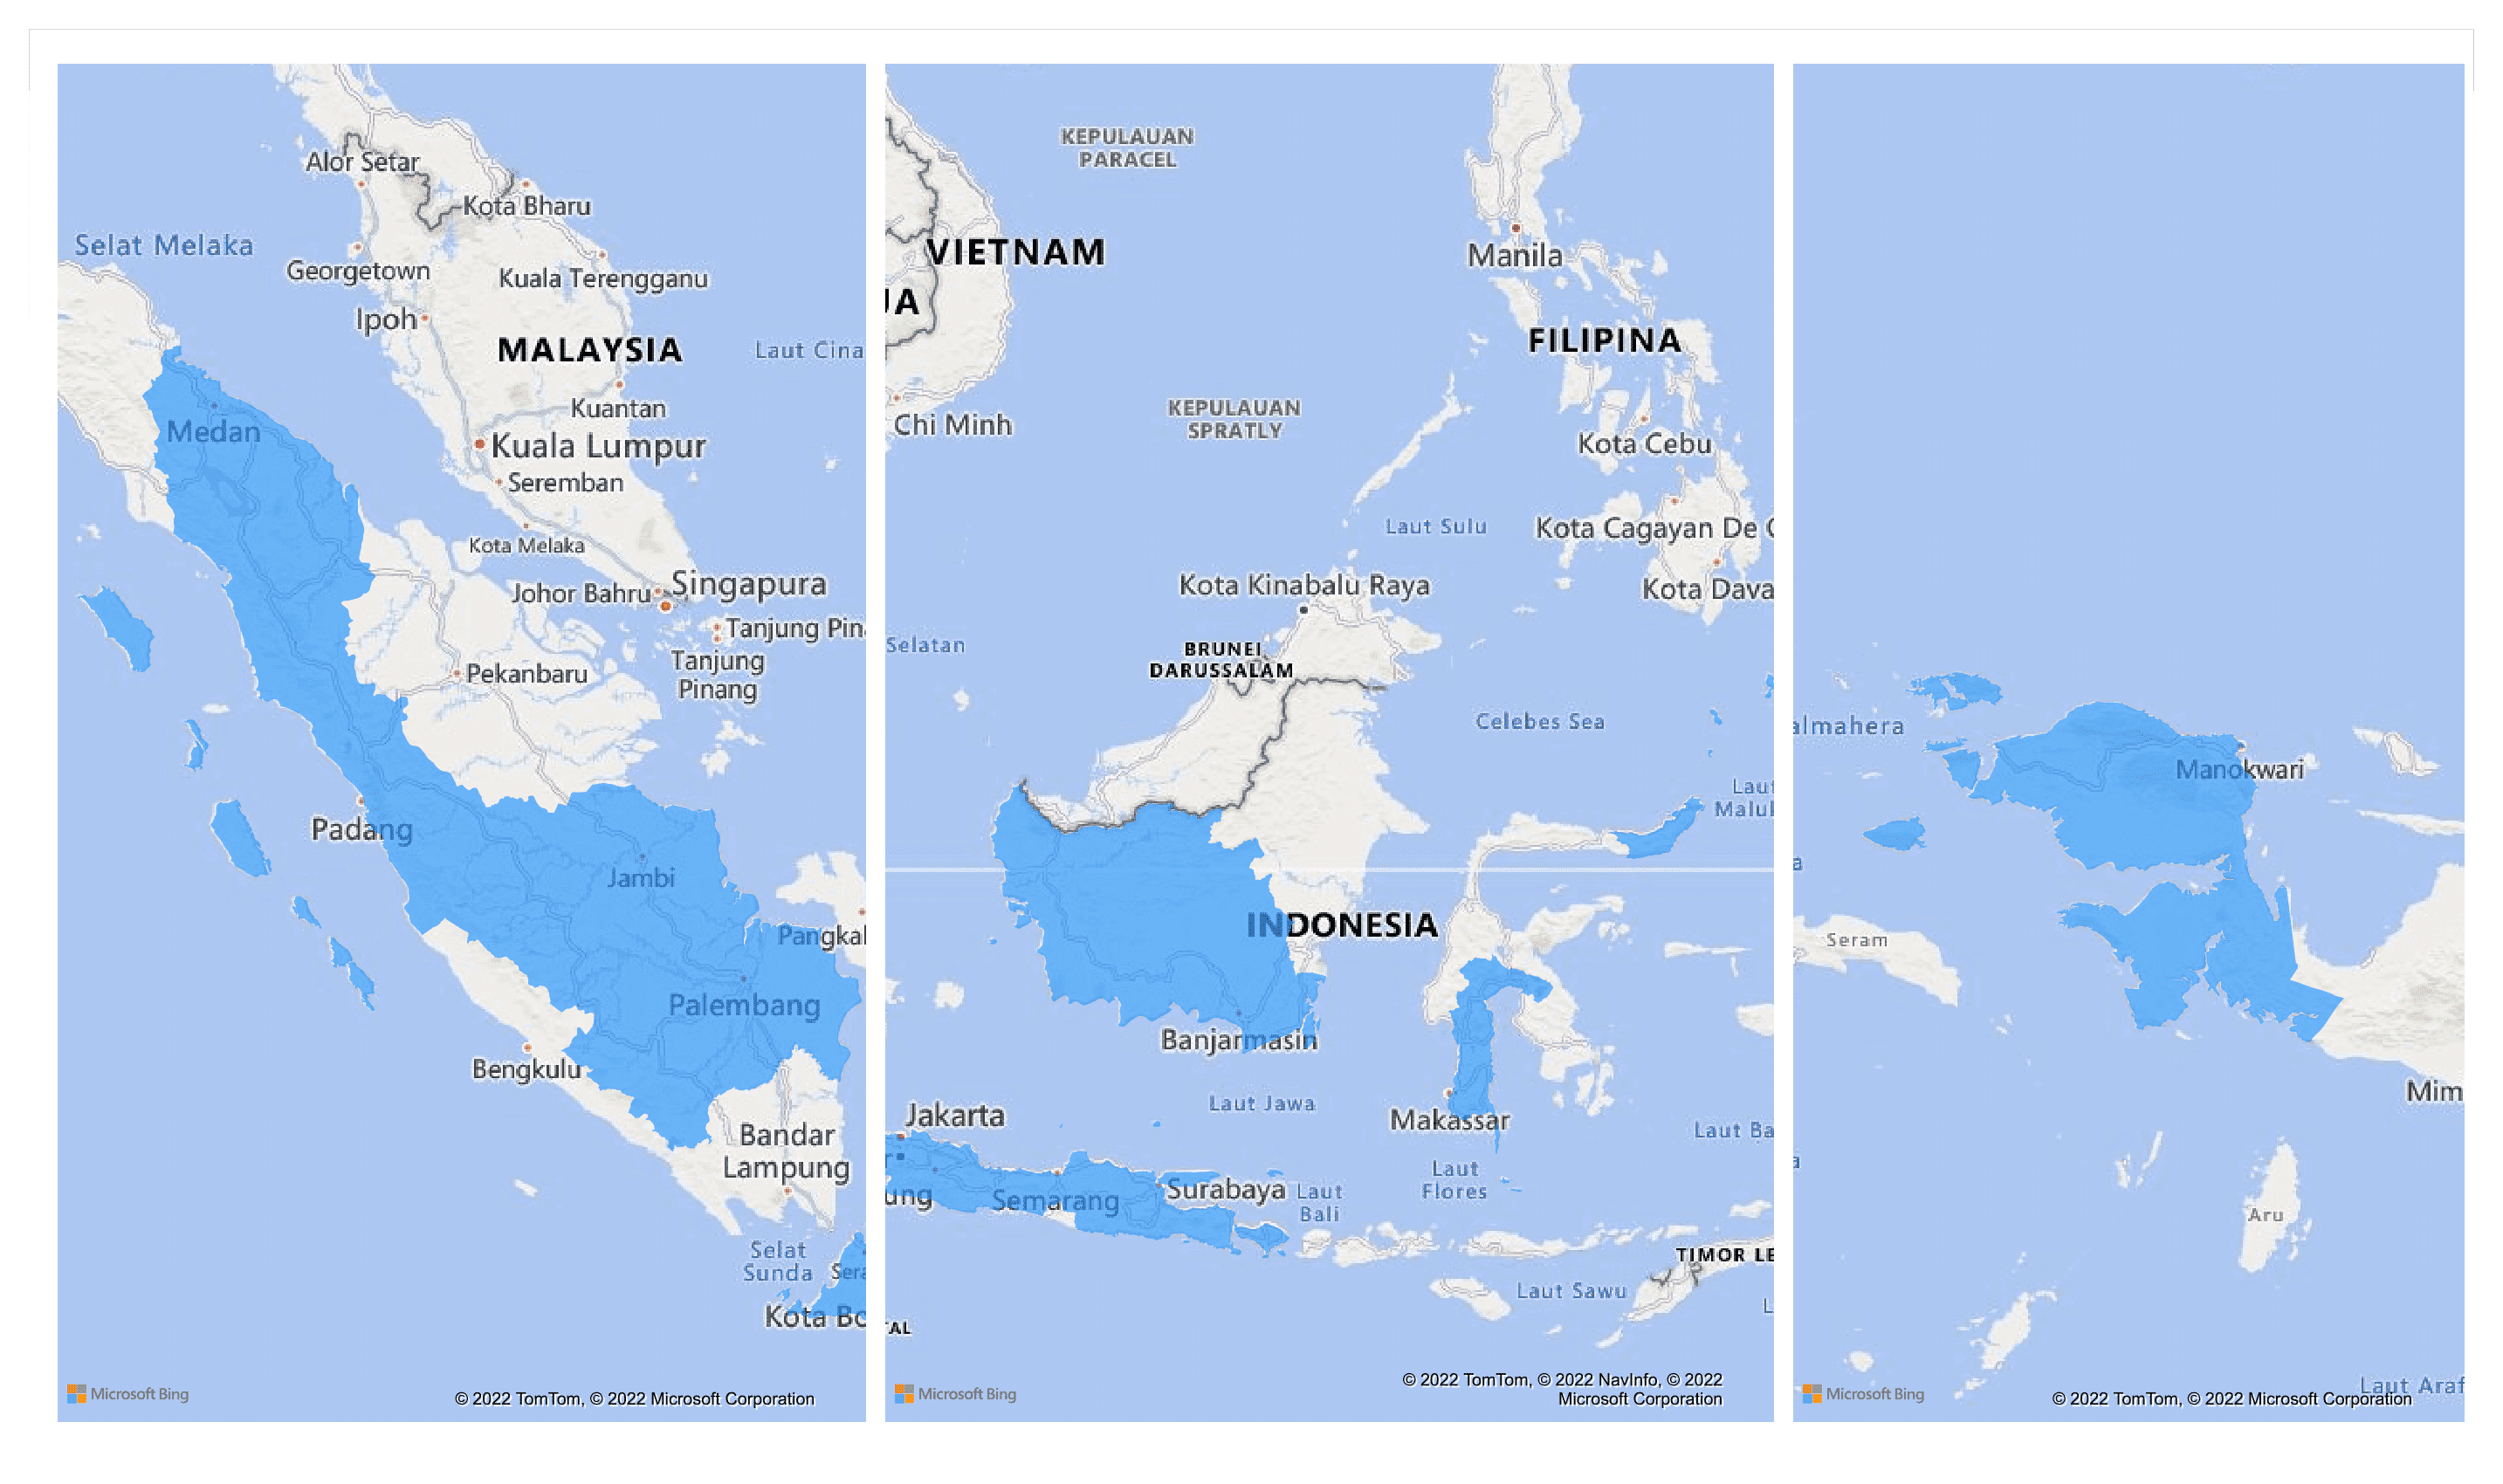

In [15]:
from pandasql import sqldf
import pandas as pd
singapore = pd.read_csv("../input/singapore-food/singapore_id.csv", sep = ";")

# Overview

Here is all the list of restaurants sorted by region and city, there are also their unique menu, price, and ratings. Most of prices ranged from 20k until 65k and ratings are quite rave. Medan and Palembang is the most available restaurant.

In [3]:
singapore = sqldf("""SELECT no, restaurant_name, region, city, unique_menu, price, 
                            ltrim(google_rating) as google_rating, 
                            ltrim(platform_rating) as platform_rating 
                     FROM singapore 
                     WHERE region LIKE '%Sumatra' OR 
                           region LIKE '%Kalimantan' OR 
                           region LIKE '%Sulawesi' OR 
                           region LIKE '%Papua'""")
singapore.style.hide_index()

no,restaurant_name,region,city,unique_menu,price,google_rating,platform_rating
78,Singapore Chicken Rice,West Kalimantan,Pontianak,Nasi Hainam,None,5.0,0.0
79,Onechick,West Kalimantan,Pontianak,Soya Sauce Steamed Chicken Rice,20000,4.5,4.5
80,Palangka Kopitiam,Central Kalimantan,Palangkaraya,Nasi Goreng Seafood,40000,3.9,4.0
81,New Star Kopitiam Resto,South Kalimantan,Balikpapan,Roti Bakar Selai Srikaya,24000,4.1,3.5
82,Abun Kopitiam,South Kalimantan,Balikpapan,Roti Bakar Srikaya,None,4.4,4.3
83,Bakmi Singapore,North Sulawesi,Manado,Bakmi Spesial SG,12500,4.0,2.5
84,SING Bakuteh Manado,North Sulawesi,Manado,Pork Ribs Soup,49000,4.0,5.0
85,Bangi Kopi Perintis,South Sulawesi,Makassar,Daily Prawn Wantan,39000,4.3,4.2
86,Bubur Singapore,South Sulawesi,Makassar,Bubur Kepiting,60000,3.9,5.0
87,Aman Hainanse Chicken Rice,North Sumatra,Medan,Nasi Hainam Chasio,32000,4.6,4.7


# Menu

Like the previous part, I'll divide those menu on three category, which are Rice & Noodle Menu, Poultry Menu, and Toast & Snack Menu.

**Rice & Noodle**

Here is their Rice and Noodle Menu. For the rice they mostly have hainanse rice and various porridge. For noodle they have noodle (mostly mee goreng) and kway teow. Also there are laksa and bakmi ayam as well. All shown here are representative for each city, so then check issue for complete csv available.

There are some restaurant doesn't serving noodle which are **Singapore Chicken Rice (Pontianak), One Chick (Pontianak), Bubur Singapore (Makassar), Aman Hainanse Chicken Rice, and Liu Kee (Medan)**, only hainanse rice available. **Rajawali Kopitiam (Palembang)** does have bakmi ayam only. 

For disambiguation, mee is mie/noodle, fried rice is nasi goreng, kway teow is kwetiaw, beehoon is bihun, and hainanse rice is nasi hainam. Bakmi ayam is quite similar with wonton noodle but it's different after all.

In [5]:
singapore  = sqldf("""SELECT restaurant_name, city, rice_menu, noodle, noodle_specific
                      FROM singapore
                      WHERE region LIKE '%Sumatra' OR 
                            region LIKE '%Kalimantan' OR 
                            region LIKE '%Sulawesi' OR 
                            region LIKE '%Papua'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,rice_menu,noodle,noodle_specific
New Star Kopitiam Resto,Balikpapan,"hainanse rice, rice plate, fried rice","noodle, kway teow, beehoon","curry noodle, bakmi ayam, mie demek"
Bangi Kopitiam Jayapura,Jayapura,"hainanse rice, rice bowl, rice plate, fried rice","noodle, kway teow","curry noodle, prawn noodle, noodle soup, pad thai, mee goreng, wonton noodle, hor fun, laksa"
Bangi Kopi Perintis,Makassar,"hainanse rice, rice bowl, rice plate, fried rice","noodle, kway teow","curry noodle, prawn noodle, noodle soup, pad thai, mee goreng, wonton noodle, hor fun, laksa"
Bakmi Singapore,Manado,"fried rice, rice plate",noodle,"bakmi ayam, mee goreng"
Aman Hainanse Chicken Rice,Medan,hainanse rice,no,no
Pondok Kopitiam,Padang,"hainanse rice, porridge, fried rice","noodle, kway teow","mee goreng, bakmi ayam (breakfast only)"
Palangka Kopitiam,Palangkaraya,"hainanse rice, rice plate, nasi lemak","noodle, kway teow, beehoon","mee goreng, noodle soup"
Bangi Kopitiam Palembang,Palembang,"hainanse rice, rice bowl, rice plate, fried rice","noodle, kway teow","curry noodle, prawn noodle, noodle soup, pad thai, mee goreng, wonton noodle, hor fun, laksa"
Singapore Chicken Rice,Pontianak,"hainanse rice, rice plate",no,no


**Poultry Menu**

Based on the list here, the poultry menu are mostly dominated by chicken but only as a topping (signed by 'yes'), but some places have chicken speciality like kungpao and blackpepper. The seafood is quite rare but some places mostly has prawn as majority. Restaurant serving seafood are **New Star Kopitiam Resto (Balikpapan)**--prawn only, **Bubur Singapore (Makassar), M Kopitiam (Palembang), and New Town Kopitiam Bukit Golf (Palembang)**. There are three places serving pork, which are **Singapore Chicken Rice (Pontianak), Aman Hainanse Chicken Rice (Medan), and SING Bakuteh (Manado)**. Mostly the other poultry dominated by vegetables.

In [7]:
singapore  = sqldf("""SELECT restaurant_name, city, chicken, seafood, poultry_other
                      FROM singapore
                      WHERE region LIKE '%Sumatra' OR 
                            region LIKE '%Kalimantan' OR 
                            region LIKE '%Sulawesi' OR 
                            region LIKE '%Papua'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,chicken,seafood,poultry_other
New Star Kopitiam Resto,Balikpapan,"mushroom, sweet and sour, butter, fried, spicy, kungpao etc,",prawn,"beef, tofu"
Bangi Kopitiam Jayapura,Jayapura,"geprek, teriyaki, blackpaper, kungpao, steak",no,vegetables
Bangi Kopi Perintis,Makassar,"geprek, teriyaki, blackpaper, kungpao, steak",no,vegetables
Bakmi Singapore,Manado,no,no,beef
Aman Hainanse Chicken Rice,Medan,yes,no,pork
Pondok Kopitiam,Padang,basil,no,no
Palangka Kopitiam,Palangkaraya,yes,yes,beef (rendang)
Bangi Kopitiam Palembang,Palembang,"geprek, teriyaki, blackpaper, kungpao, steak",no,vegetables
Singapore Chicken Rice,Pontianak,yes,no,pork


**Toast & Snack Menu**

Similar with the previous part, kaya toast is also popular in this area. Which means kaya toast is the most popular Singaporean toast for entire Indonesia. As for snack the fries are the most popular, but there is a place named **Aman Hainanse Chicken Rice (Medan)** which has unique snack which no other place have, like chasio, siobak, and pekamche. In this section, toast and snack are listed separately.

In [10]:
singapore  = sqldf("""SELECT restaurant_name, city, toast
                      FROM singapore
                      WHERE (region LIKE '%Sumatra' OR 
                             region LIKE '%Kalimantan' OR 
                             region LIKE '%Sulawesi' OR 
                             region LIKE '%Papua') 
                        AND (toast NOT LIKE '%no')""")
singapore.style.hide_index()

restaurant_name,city,toast
Palangka Kopitiam,Palangkaraya,"kaya, chocolate, cheese, strawberry, chocolate cheese"
New Star Kopitiam Resto,Balikpapan,"kaya, chocolate cheese, butter sugar"
Abun Kopitiam,Balikpapan,kaya
Bangi Kopi Perintis,Makassar,"peanut, butter, milo, kaya, ice cream, egg, portugese, nutella, french etc,"
Uncle K Sun Plaza,Medan,"kaya, curry chicken, peanut butter, ice cream etc,"
Kiliney Sun Plaza,Medan,"kaya butter, ovomaltine, pineapple, peanut, butter sugar, french etc,"
Pondok Kopitiam,Padang,"kaya pandan, kaya toast, pineapple, butter, egg"
Bangi Kopitiam Palembang,Palembang,"peanut, butter, milo, milk, kaya, ice cream, egg, portugese, nutella, french"
New Town Kopitiam,Palembang,"kaya, chocolate cheese, floss, milo, melted cheese, smoke beef and cheese"
Rajawali Kopitiam,Palembang,"kaya, chocolate cheese, skippy"


In [12]:
singapore  = sqldf("""SELECT restaurant_name, city, snack_dish
                      FROM singapore
                      WHERE (region LIKE '%Sumatra' OR 
                             region LIKE '%Kalimantan' OR 
                             region LIKE '%Sulawesi' OR 
                             region LIKE '%Papua') 
                        AND (snack_dish NOT LIKE '%no')""")
singapore.style.hide_index()

restaurant_name,city,snack_dish
Singapore Chicken Rice,Pontianak,"ngohiang, shumai"
Palangka Kopitiam,Palangkaraya,"banana fritter, cassava, french fries, tofu"
New Star Kopitiam Resto,Balikpapan,"french fries, pasta, shumay, maryam bread"
Abun Kopitiam,Balikpapan,wonton
Bakmi Singapore,Manado,"shumai, wonton"
SING Bakuteh Manado,Manado,"cakwe, bok choy"
Bangi Kopi Perintis,Makassar,"shumai, wonton, hakau, steamed bun, french fries, cassava, prata"
Aman Hainanse Chicken Rice,Medan,"chasio, siobak, pekcamkhe"
Uncle K Sun Plaza,Medan,"martabak, roti tissue, prata bread, chinese dougnuts etc,"
Kiliney Sun Plaza,Medan,"prata bread, banana fritter, steamed bun, shumai, martabak etc,"


# Facility

All of them have takeaway options and majority of them has delivery options except some places. None of them has outdoor seat and smoking area, except Bangi Kopitiam, M Kopitiam, New Town Kopitiam, Pace Tan Pu Kopitiam, and Lins Kopitiam for the outdoor, and SING Bakuteh Manado and Rajawali Kopitiam for the smoking place. Note that sometimes outdoor area is also a smoking area. 

Only three places serving alcohol, which are **Bangi Kopitiam (Palembang), New Town Kopitiam (Palembang),** and **M Kopitiam (Palembang)**. Lastly, wifi is available in small number, mostly in Palembang and Papua area.

Grouped by city.

In [14]:
singapore  = sqldf("""SELECT restaurant_name, city, takeaway, delivery, 
                             outdoor_seat, smoking_area, alcohol_served, wifi
                      FROM singapore
                      WHERE region LIKE '%Sumatra' OR 
                            region LIKE '%Kalimantan' OR 
                            region LIKE '%Sulawesi' OR 
                            region LIKE '%Papua'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,takeaway,delivery,outdoor_seat,smoking_area,alcohol_served,wifi
New Star Kopitiam Resto,Balikpapan,yes,no,no,no,no,no
Bangi Kopitiam Jayapura,Jayapura,yes,no,no,no,no,yes
Bangi Kopi Perintis,Makassar,yes,yes,no,no,no,no
Bakmi Singapore,Manado,yes,no,no,no,no,no
Aman Hainanse Chicken Rice,Medan,yes,yes,no,no,no,no
Pondok Kopitiam,Padang,yes,yes,no,no,no,no
Palangka Kopitiam,Palangkaraya,yes,no,no,no,no,yes
Bangi Kopitiam Palembang,Palembang,yes,yes,yes,no,beer,yes
Singapore Chicken Rice,Pontianak,yes,yes,no,no,no,no


# Rating

These ratings are ordered by highest total rating, should they have more than 3.5 then the restaurant is worth to try. All the facility and menu are representated by all both google and platform rating and count, so in the meantime only ratings are counted here. Based on the results, **Liu Kee Hainanse Chicken Rice (Medan), M Kopitiam (Palembang)**, and **Aman Hainanse Chicken Rice (Medan)** are the top 3 among the list.

Based on the area, for Sumatra they got **Liu Kee Hainanse Chicken Rice** which is the best from Medan (scored 4,9). Then from Palembang they have **M Kopitiam** which is the most proper (scored 4,85). **Pondok Kopitiam** is the only one Singaporean related kopitiam remaining in Padang (scored 4,5).

For Kalimantan area, **Onechick (Pontianak)** has the highest rating among their region (scored 4,5). **Abun Kopitiam** is better than New Star Kopitiam Resto in Balikpapan (scored both 4,35 and 3,8). **Palangka Kopitiam** is the only one Singaporean related cuisine in Palangkaraya (scored 3,95).

In Sulawesi, **SING Bakuteh Manado** is the best on the region (scored 4,5) and **Bubur Singapore** is the most popular on Makassar (scored 4,45).

Lastly, **Bangi Kopitiam Jayapura** is the best from Jayapura among the three (scored 4,55).

In [16]:
singapore = sqldf("""SELECT restaurant_name, city, 
                            ltrim(google_rating) as google_rating, 
                            ltrim(platform_rating) as platform_rating, 
                            ltrim((google_rating + platform_rating)/2) as total_rating,
                        CASE
                            WHEN (google_rating + platform_rating)/2 >= 3.5 THEN "Recommended"
                            ELSE "Reconsider"
                            END AS "Recommendation"
                        FROM singapore 
                        WHERE region LIKE '%Sumatra' OR 
                              region LIKE '%Kalimantan' OR 
                              region LIKE '%Sulawesi' OR 
                              region LIKE '%Papua'
                        ORDER BY total_rating DESC""")
singapore.style.hide_index()

restaurant_name,city,google_rating,platform_rating,total_rating,Recommendation
Liu Kee Hainanse Chicken Rice,Medan,5.0,4.8,4.9,Recommended
M Kopitiam,Palembang,4.7,5.0,4.85,Recommended
Aman Hainanse Chicken Rice,Medan,4.6,4.7,4.65,Recommended
10 SP Hainan Chicken Rice,Medan,4.6,4.7,4.65,Recommended
Rajawali Kopitiam,Palembang,4.4,4.7,4.55,Recommended
Bangi Kopitiam Jayapura,Jayapura,4.2,4.9,4.55,Recommended
Onechick,Pontianak,4.5,4.5,4.5,Recommended
SING Bakuteh Manado,Manado,4.0,5.0,4.5,Recommended
Kiliney Sun Plaza,Medan,4.3,4.7,4.5,Recommended
Pondok Kopitiam,Padang,4.5,4.5,4.5,Recommended
